In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df= pd.read_csv('myanimelist_recommender_ready.csv')


df.head()

,mal_id,title,title_english,title_japanese,type,episodes,status,score,rank,popularity,members,favorites,synopsis,genres,themes,demographics,studios,year,url
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,TV,26.0,Finished Airing,8.75,46.0,42,1975882,86621,"Crime is timeless. By the year 2071, humanity ...","Action, Award Winning, Sci-Fi","Adult Cast, Space",NaN,Sunrise,1998.0,https://myanimelist.net/anime/1/Cowboy_Bebop
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,Movie,1.0,Finished Airing,8.38,215.0,642,398122,1711,"Another day, another bounty—such is the life o...","Action, Sci-Fi","Adult Cast, Space",NaN,Bones,NaN,https://myanimelist.net/anime/5/Cowboy_Bebop__...
2,6,Trigun,Trigun,トライガン,TV,26.0,Finished Airing,8.22,378.0,260,803358,16863,"Vash the Stampede is the man with a $$60,000,0...","Action, Adventure, Sci-Fi",Adult Cast,Shounen,Madhouse,1998.0,https://myanimelist.net/anime/6/Trigun
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26.0,Finished Airing,7.23,3260.0,1950,123424,674,"Though hidden away from the general public, Wi...","Action, Drama, Mystery, Supernatural",Detective,NaN,Sunrise,2002.0,https://myanimelist.net/anime/7/Witch_Hunter_R...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,TV,52.0,Finished Airing,6.92,4819.0,5655,16308,16,It is the dark century and the people are suff...,"Action, Adventure, Fantasy",NaN,Shounen,Toei Animation,2004.0,https://myanimelist.net/anime/8/Bouken_Ou_Beet


In [56]:
#statistika dasar

print(f"Episode : {df['episodes'].describe()}\n")
print(f"Score : {df['score'].describe()}\n")
print(f"Member : {df['members'].describe()}")

Episode : count    27931.000000
mean        14.147148
std         47.300443
min          1.000000
25%          1.000000
50%          2.000000
75%         13.000000
max       3057.000000
Name: episodes, dtype: float64

Score : count    18598.000000
mean         6.397713
std          0.889745
min          1.890000
25%          5.780000
50%          6.370000
75%          7.030000
max          9.300000
Name: score, dtype: float64

Member : count    2.870700e+04
mean     3.842745e+04
std      1.658327e+05
min      0.000000e+00
25%      2.350000e+02
50%      1.085000e+03
75%      9.154000e+03
max      4.173914e+06
Name: members, dtype: float64


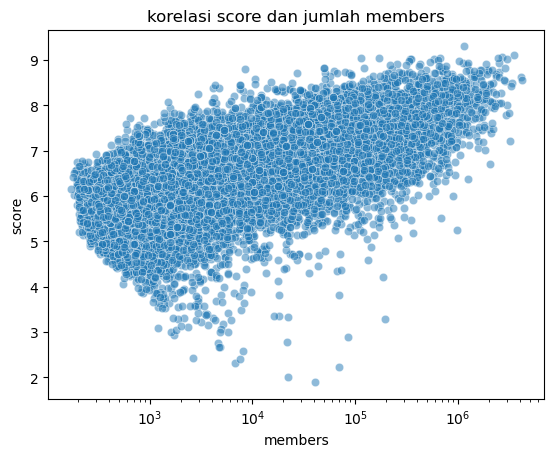

In [62]:
korelasi = df[['score','members']].corr().iloc[0,1]

sns.scatterplot(data=df , x="members", y="score", alpha=0.5)
plt.title("korelasi score dan jumlah members")
plt.xscale('log')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

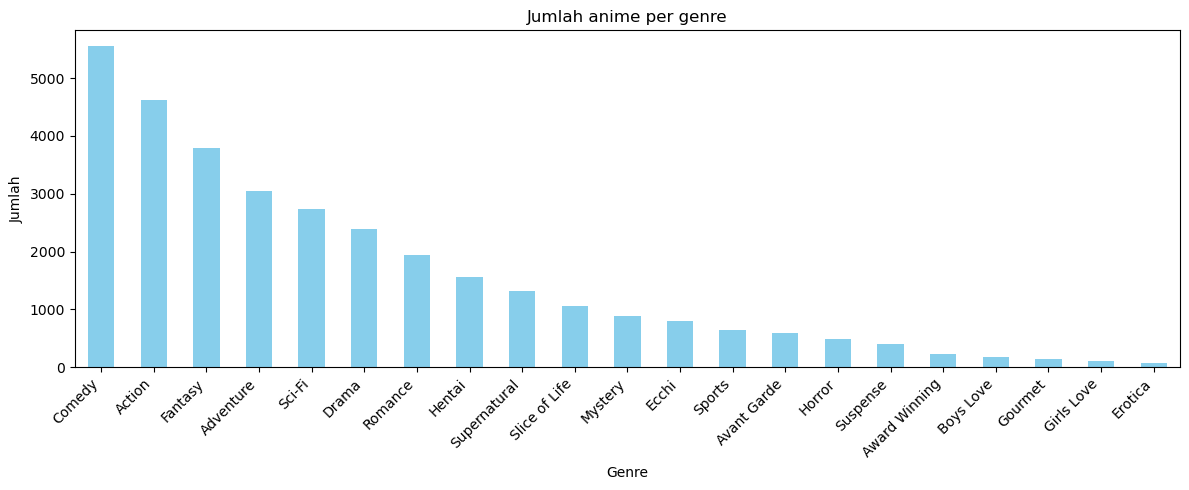

In [71]:
df['genres'] = df['genres'].apply(lambda x: [g.strip() for g in x.split(', ')]if isinstance(x, str) else [])
df_genres = df.explode('genres')

genre_stats = df_genres.groupby('genres').agg(
    count= ('score','count'),
    avg= ('score','mean')
).sort_values(by='count',ascending=False)

plt.figure(figsize=(12,5))
genre_stats['count'].plot(kind="bar", color="skyblue")
plt.title("Jumlah anime per genre")
plt.xlabel("Genre")
plt.ylabel("Jumlah")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

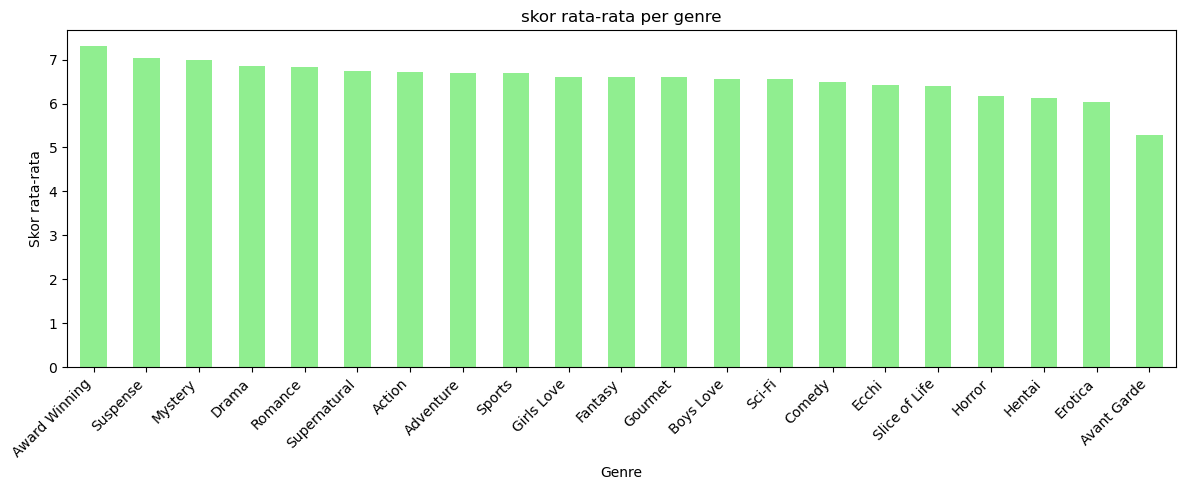

In [74]:
plt.figure(figsize=(12,5))
genre_stat['avg'].sort_values(ascending=False).plot(kind="bar", color= "lightgreen")
plt.title('skor rata-rata per genre')
plt.xlabel("Genre")
plt.ylabel("Skor rata-rata")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

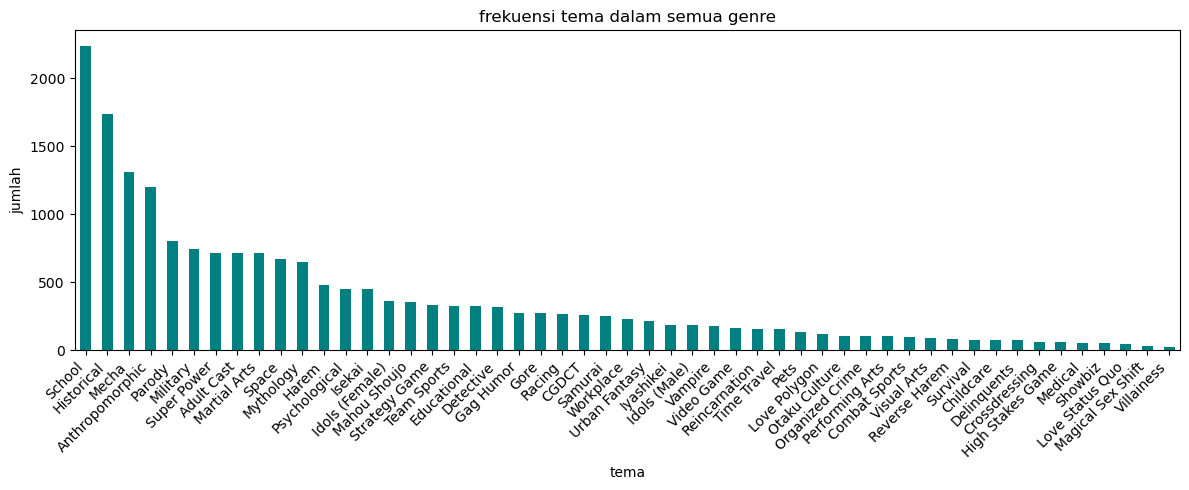

In [86]:
df['themes'] = df['themes'].apply(lambda x: [g.strip() for g in x.split(', ')]if isinstance(x,str) else [])
df_themes = df.explode('themes')

df_themes = df_themes[df_themes['themes'].notna() &(df_themes['themes']!='')]
df_themes = df_themes[df_themes['themes'] != "Music"]

themes_count = df_themes['themes'].value_counts()

plt.figure(figsize=(12,5))
themes_count.plot(kind="bar", color= "teal")
plt.title('frekuensi tema dalam semua genre')
plt.xlabel("tema")
plt.ylabel("jumlah")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show

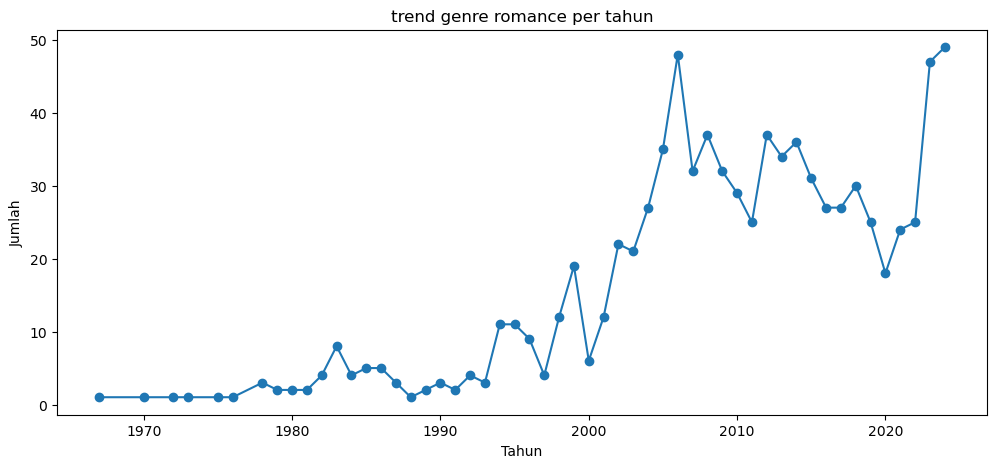

In [111]:
df['genres'] = df['genres'].apply(lambda x:[g.strip() for g in x.split(", ")]if isinstance(x,str)else [])
df_romance = df[df['genres'].apply(lambda x: isinstance (x, list) and "Romance" in x) &df['year'].notna()].copy()

df_romance['year'] = df_romance['year'].astype(int)
df_romance = df_romance[~df_romance['year'].isin([2025,2026])]

romance_trend = df_romance.groupby('year').size()

plt.figure(figsize=(12,5))
romance_trend.plot(kind="line", marker='o')
plt.title('trend genre romance per tahun')
plt.xlabel("Tahun")
plt.ylabel("Jumlah")
plt.show()

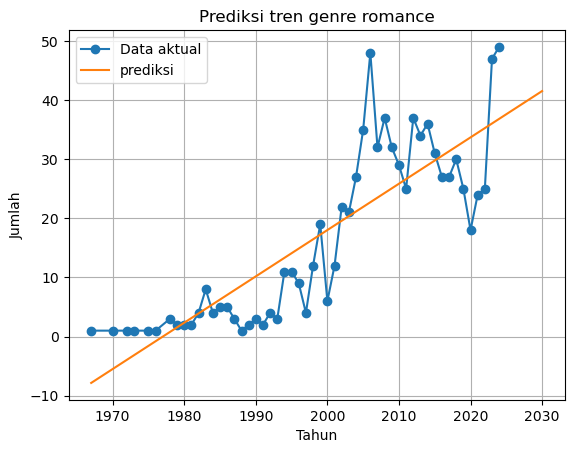

In [115]:
romance_trend = romance_trend.dropna()
X = romance_trend.index.values.reshape(-1,1)
y= romance_trend.values

model = LinearRegression()
model.fit(X,y)

pred=np.arange(X.min(),2031).reshape(-1,1)
predicted = model.predict(pred)

plt.plot(X,y, label="Data aktual", marker = "o")
plt.plot(pred, predicted, label = "prediksi")
plt.title("Prediksi tren genre romance")
plt.xlabel("Tahun")
plt.ylabel("Jumlah")
plt.legend()
plt.grid(True)
plt.show()